h

In [1]:
import pandas as pd
import numpy as np
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread
from scipy import spatial
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import os

In [2]:


train_path = 'sign_data/Dataset/train/'
test_path = 'sign_data/Dataset/test/'

In [3]:
import os

def count_images_in_folders(path):
    # Obtenir la liste des sous-dossiers dans le dossier train qui ne contiennent pas 'forg'
    subfolders = [f.path for f in os.scandir(path) if f.is_dir() and 'forg' not in f.name]

    # Pour chaque sous-dossier, afficher le nombre d'images
    for subfolder in subfolders:
        images = [f for f in os.listdir(subfolder) if os.path.isfile(os.path.join(subfolder, f))]
        print(f"Le sous-dossier {subfolder} contient {len(images)} images.")



In [4]:

# Utiliser la fonction avec le chemin spécifié
count_images_in_folders(train_path)

Le sous-dossier sign_data/Dataset/train/001 contient 24 images.
Le sous-dossier sign_data/Dataset/train/002 contient 24 images.
Le sous-dossier sign_data/Dataset/train/003 contient 24 images.
Le sous-dossier sign_data/Dataset/train/004 contient 24 images.
Le sous-dossier sign_data/Dataset/train/006 contient 24 images.
Le sous-dossier sign_data/Dataset/train/009 contient 24 images.
Le sous-dossier sign_data/Dataset/train/012 contient 24 images.
Le sous-dossier sign_data/Dataset/train/013 contient 12 images.
Le sous-dossier sign_data/Dataset/train/014 contient 24 images.
Le sous-dossier sign_data/Dataset/train/015 contient 24 images.
Le sous-dossier sign_data/Dataset/train/016 contient 23 images.
Le sous-dossier sign_data/Dataset/train/017 contient 12 images.
Le sous-dossier sign_data/Dataset/train/018 contient 12 images.
Le sous-dossier sign_data/Dataset/train/019 contient 12 images.
Le sous-dossier sign_data/Dataset/train/020 contient 12 images.
Le sous-dossier sign_data/Dataset/train/

In [5]:
# Utiliser la fonction avec le chemin spécifié
count_images_in_folders(test_path)

Le sous-dossier sign_data/Dataset/test/049 contient 12 images.
Le sous-dossier sign_data/Dataset/test/050 contient 12 images.
Le sous-dossier sign_data/Dataset/test/051 contient 12 images.
Le sous-dossier sign_data/Dataset/test/052 contient 12 images.
Le sous-dossier sign_data/Dataset/test/053 contient 12 images.
Le sous-dossier sign_data/Dataset/test/054 contient 12 images.
Le sous-dossier sign_data/Dataset/test/055 contient 12 images.
Le sous-dossier sign_data/Dataset/test/056 contient 12 images.
Le sous-dossier sign_data/Dataset/test/057 contient 12 images.
Le sous-dossier sign_data/Dataset/test/058 contient 12 images.
Le sous-dossier sign_data/Dataset/test/059 contient 12 images.
Le sous-dossier sign_data/Dataset/test/060 contient 12 images.
Le sous-dossier sign_data/Dataset/test/061 contient 12 images.
Le sous-dossier sign_data/Dataset/test/062 contient 12 images.
Le sous-dossier sign_data/Dataset/test/063 contient 12 images.
Le sous-dossier sign_data/Dataset/test/064 contient 12 

In [6]:
import os

def count_images_with_forg_in_folders(folder_path):
    total_images = 0
    total_forg_images = 0
    # Parcourir le dossier et ses sous-dossiers de manière récursive
    for root, dirs, files in os.walk(folder_path):
        # Vérifier si le nom du dossier contient 'forg'
        if 'forg' in root:
            # Compter le nombre d'images dans ce dossier
            images = [f for f in files if os.path.isfile(os.path.join(root, f))]
            total_forg_images += len(images)
        else:
            # Compter le nombre d'images sans 'forg'
            images_without_forg = [f for f in files if "forg" not in f]
            total_images += len(images_without_forg)
    return total_images, total_forg_images



In [7]:
total_images_train, total_forg_images_train = count_images_with_forg_in_folders(train_path)
total_images_test, total_forg_images_test = count_images_with_forg_in_folders(test_path)

# Affichage des résultats
print(f"Le dossier '{train_path}' contient un total de {total_images_train + total_forg_images_train } images \n  {total_images_train} images de signatures réelles \n  {total_forg_images_train} images de signatures forgées.")
print(f"Le dossier '{test_path}' contient un total de {total_images_test +total_forg_images_test} images \n  {total_images_test} images de signatures réelles \n {total_forg_images_test} images de signatures forgées.")

Le dossier 'sign_data/Dataset/train/' contient un total de 1649 images 
  887 images de signatures réelles 
  762 images de signatures forgées.
Le dossier 'sign_data/Dataset/test/' contient un total de 500 images 
  252 images de signatures réelles 
 248 images de signatures forgées.


In [8]:
import matplotlib.pyplot as plt

def plot_images_distribution(train_path, total_images_train, total_forg_images_train):
    # Données pour le diagramme circulaire
    labels = ['Avec "forg"', 'Sans "forg"']
    sizes = [total_forg_images_train, total_images_train]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # Mettre en évidence la tranche "Avec 'forg'"

    # Créer le diagramme circulaire
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Assurer que le diagramme est un cercle
    plt.title(f"Répartition des images dans '{train_path}'")
    plt.show()



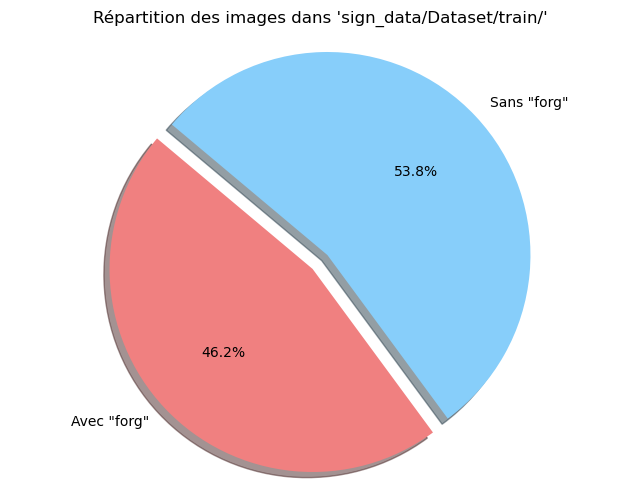

In [9]:
# Utiliser la fonction pour afficher le diagramme circulaire
plot_images_distribution(train_path, total_images_train, total_forg_images_train)


In [10]:
total_images_test, total_forg_images_test = count_images_with_forg_in_folders(test_path)

# Afficher le nombre total d'images sans 'forg' et avec 'forg'
print(f"Le dossier '{test_path}' contient un total de {total_images_test} images sans 'forg' et {total_forg_images_test} images avec 'forg'.")


Le dossier 'sign_data/Dataset/test/' contient un total de 252 images sans 'forg' et 248 images avec 'forg'.


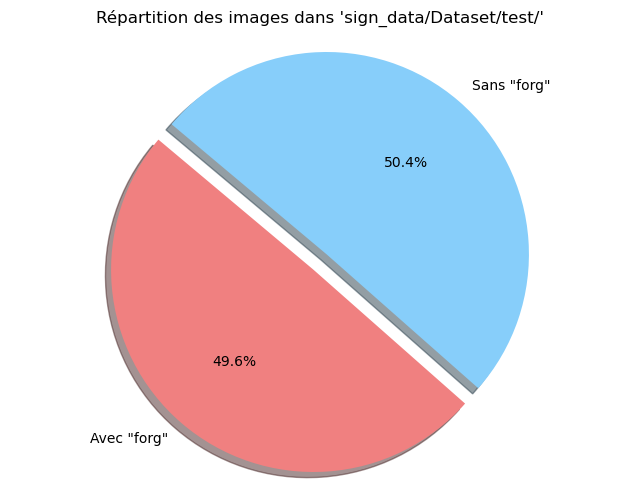

In [11]:
# Utiliser la fonction pour afficher le diagramme circulaire
plot_images_distribution(test_path, total_images_test, total_forg_images_test)

In [12]:
import os

def get_unique_image_extensions(folder_path):
    # Initialiser un ensemble pour stocker les extensions uniques
    unique_extensions = set()

    # Parcourir le dossier et ses sous-dossiers de manière récursive
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Obtenir le nom du fichier
            _, extension = os.path.splitext(file)
            # Ajouter l'extension à l'ensemble
            unique_extensions.add(extension)

    return unique_extensions

# Utiliser la fonction pour obtenir les extensions uniques des images dans le dossier train
train_extensions = get_unique_image_extensions(train_path)
test_extensions=get_unique_image_extensions(test_path)
# Afficher les extensions uniques
print("Extensions uniques des images dans le dossier train:")
for ext in train_extensions:
    print(ext)
print("Extensions uniques des images dans le dossier test:")
for exts in test_extensions:
    print(exts)


Extensions uniques des images dans le dossier train:
.PNG
.png
Extensions uniques des images dans le dossier test:
.PNG
.png


In [13]:
import cv2
import os
import pandas as pd

def get_unique_image_dimensions(folder_path):
    # Initialiser un ensemble pour stocker les dimensions uniques
    unique_dimensions = set()
    
    # Parcourir le dossier et ses sous-dossiers de manière récursive
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Obtenir le chemin complet de l'image
            image_path = os.path.join(root, file)
            # Lire l'image à l'aide de OpenCV
            img = cv2.imread(image_path)
            if img is not None:
                # Ajouter les dimensions à l'ensemble
                unique_dimensions.add(img.shape)

    # Créer un DataFrame à partir des dimensions uniques
    df = pd.DataFrame(list(unique_dimensions), columns=['Height', 'Width', 'Channels'])
    
    return df

# Utiliser la fonction pour obtenir les dimensions uniques des images dans le dossier train
train_dimensions_df = get_unique_image_dimensions(train_path)

# Afficher le DataFrame
train_dimensions_df


,Height,Width,Channels
0,224,371,3
1,180,321,3
2,283,800,3
3,199,714,3
4,164,804,3
...,...,...,...
1639,203,483,3
1640,299,626,3
1641,319,685,3
1642,174,547,3


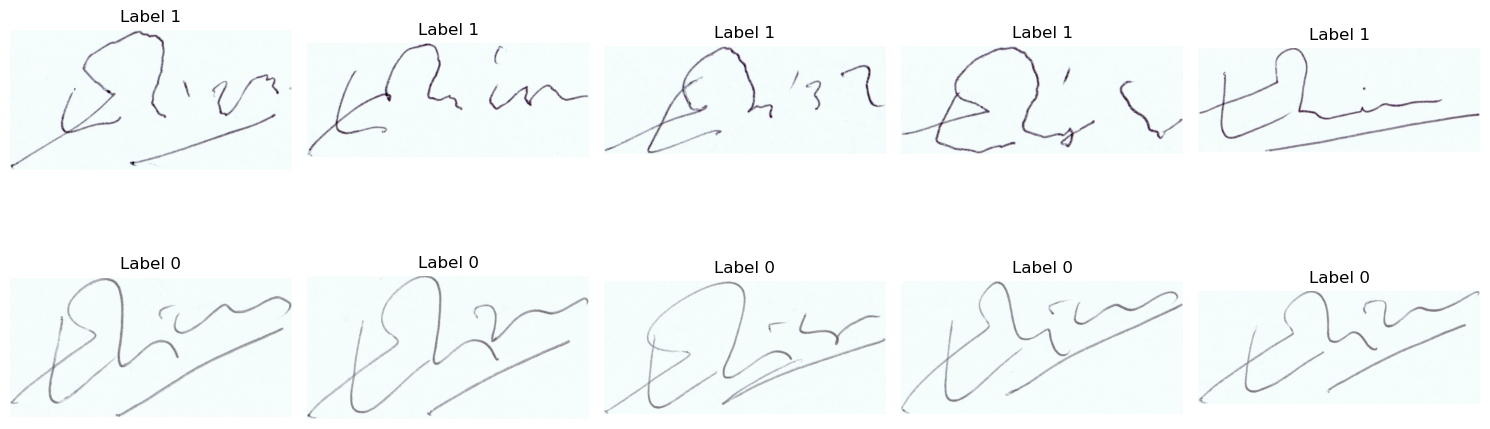

In [14]:
import cv2
import os
import matplotlib.pyplot as plt

def display_images(folder_path, num_images=10):
    # Initialiser un compteur pour suivre le nombre d'images affichées
    count_forg = 0
    count_non_forg = 0
    
    # Définir le nombre d'images à afficher pour chaque catégorie
    num_images_per_category = num_images // 2

    # Créer une figure pour afficher les images
    plt.figure(figsize=(15, 6))

    # Parcourir le dossier et ses sous-dossiers de manière récursive
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Obtenir le chemin complet de l'image
            image_path = os.path.join(root, file)
            # Lire l'image à l'aide de OpenCV
            img = cv2.imread(image_path)
            if img is not None:
                # Vérifier si l'image contient 'forg' dans le chemin
                if 'forg' in root and count_forg < num_images_per_category:
                    plt.subplot(2, num_images_per_category, count_forg + 1)
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.axis('off')  # Désactiver les axes
                    plt.title('Label 1')
                    count_forg += 1
                elif 'forg' not in root and count_non_forg < num_images_per_category:
                    plt.subplot(2, num_images_per_category, num_images_per_category + count_non_forg + 1)
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                    plt.axis('off')  # Désactiver les axes
                    plt.title('Label 0')
                    count_non_forg += 1
            if count_forg >= num_images_per_category and count_non_forg >= num_images_per_category:
                break
        if count_forg >= num_images_per_category and count_non_forg >= num_images_per_category:
            break

    # Afficher les images
    plt.tight_layout()
    plt.show()

# Utiliser la fonction pour afficher 10 images du dossier train (5 'Avec forg' et 5 'Sans forg')
train_path = 'sign_data/Dataset/train/'
display_images(train_path, num_images=10)


In [15]:
import cv2
import os
import glob

train_data = []
train_labels = []
size=100

for per in os.listdir(train_path):
    for data in glob.glob(train_path+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir(test_path):
    for data in glob.glob(test_path+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

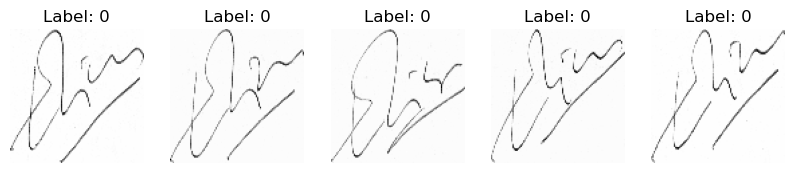

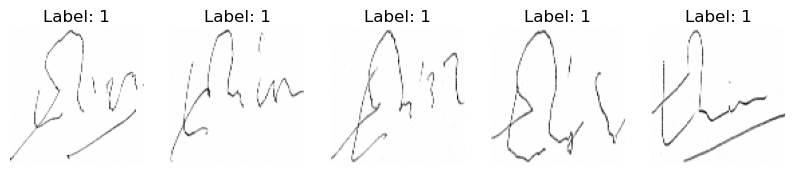

In [16]:
import matplotlib.pyplot as plt

# Afficher quelques images d'entraînement avec label 0
plt.figure(figsize=(10, 5))
count = 0
for i in range(len(train_data)):
    if train_labels[i] == 0:
        plt.subplot(1, 5, count+1)
        plt.imshow(train_data[i].reshape(size, size), cmap='gray')
        plt.title(f'Label: {train_labels[i]}')
        plt.axis('off')
        count += 1
        if count >= 5:
            break
plt.show()

# Afficher quelques images d'entraînement avec label 1
plt.figure(figsize=(10, 5))
count = 0
for i in range(len(train_data)):
    if train_labels[i] == 1:
        plt.subplot(1, 5, count+1)
        plt.imshow(train_data[i].reshape(size, size), cmap='gray')
        plt.title(f'Label: {train_labels[i]}')
        plt.axis('off')
        count += 1
        if count >= 5:
            break
plt.show()


In [17]:
# Calculer le nombre total d'images
total_images = len(train_data) + len(test_data)

# Calculer le pourcentage des images dans l'ensemble d'entraînement
train_percentage = (len(train_data) / total_images) * 100

# Calculer le pourcentage des images dans l'ensemble de test
test_percentage = (len(test_data) / total_images) * 100

# Afficher les résultats
print(f"Nombre total d'images: {total_images}")
print(f"Pourcentage d'images dans l'ensemble d'entraînement: {train_percentage:.2f}%")
print(f"Pourcentage d'images dans l'ensemble de test: {test_percentage:.2f}%")


Nombre total d'images: 2149
Pourcentage d'images dans l'ensemble d'entraînement: 76.73%
Pourcentage d'images dans l'ensemble de test: 23.27%


In [18]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [19]:
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [20]:
train_data.shape

(1649, 1, 100, 100)

In [21]:
train_data = train_data.reshape(-1, size,size, 1)
test_data = test_data.reshape(-1, size,size, 1)

In [22]:
train_data.shape


(1649, 100, 100, 1)

In [23]:
test_data.shape

(500, 100, 100, 1)

In [24]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(size,size,1),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])


network.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [26]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]


EPOCHS = 20
BS = 64
progress = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)

Epoch 1/20


19/19 [==============================] - 10s 370ms/step - loss: 0.7124 - accuracy: 0.4991 - val_loss: 0.6952 - val_accuracy: 0.4909
Epoch 2/20
19/19 [==============================] - 6s 340ms/step - loss: 0.6829 - accuracy: 0.5624 - val_loss: 0.6691 - val_accuracy: 0.6828
Epoch 3/20
19/19 [==============================] - 6s 341ms/step - loss: 0.6244 - accuracy: 0.6898 - val_loss: 0.5520 - val_accuracy: 0.7071
Epoch 4/20
19/19 [==============================] - 7s 343ms/step - loss: 0.5540 - accuracy: 0.7236 - val_loss: 0.5462 - val_accuracy: 0.7010
Epoch 5/20
19/19 [==============================] - 8s 441ms/step - loss: 0.4820 - accuracy: 0.7816 - val_loss: 0.4020 - val_accuracy: 0.8323
Epoch 6/20
19/19 [==============================] - 6s 338ms/step - loss: 0.3742 - accuracy: 0.8570 - val_loss: 0.3635 - val_accuracy: 0.8323
Epoch 7/20
19/19 [==============================] - 7s 346ms/step - loss: 0.3357 - accuracy: 0.8614 - val_loss: 0.4682 - val_accuracy: 0.8101
Epo

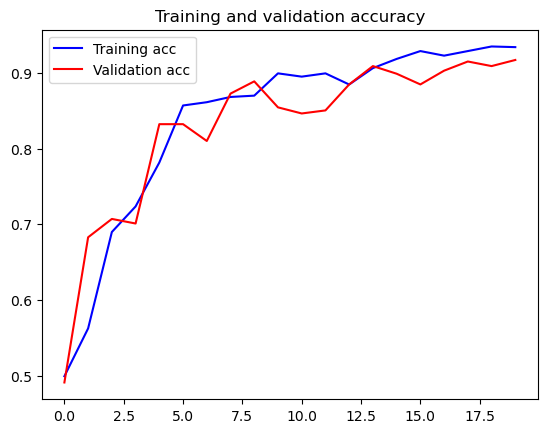

In [27]:
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.show()

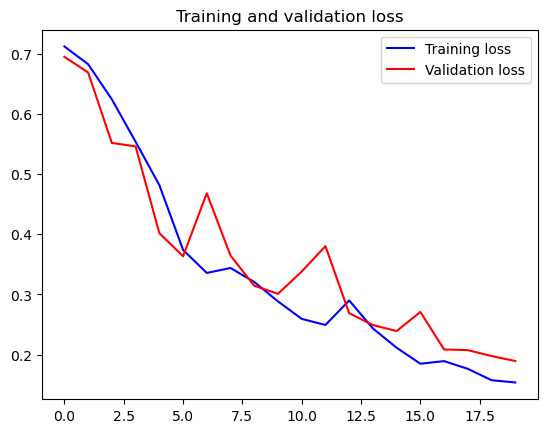

In [28]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
pred = network.predict(test_data)

16/16 [==============================] - 1s 52ms/step


In [30]:
predict =np.argmax(pred,axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy =accuracy_score(predict , test_labels)
print(f'Validation accuracy {accuracy}')

Validation accuracy 0.966


In [43]:
# Calculer le F1-score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

f1 = f1_score(test_labels, predict, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.9659775397858072


In [37]:

cm = confusion_matrix(test_labels, predict)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[249   3]
 [ 14 234]]


In [38]:

report = classification_report(test_labels, predict)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       252
           1       0.99      0.94      0.96       248

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [32]:
model_path = 'model_CNN.h5'

# Sauvegarder le modèle
network.save(model_path)

print("Modèle sauvegardé avec succès.")

Modèle sauvegardé avec succès.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


j

In [33]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import FileUpload, Output, VBox, Button
from IPython.display import display, clear_output
import io
from keras.models import load_model

best_model = load_model(filepath='model_CNN.h5')

def predict_image(img_array):
    # Convertir en niveaux de gris si l'image a 3 canaux de couleur (RGB)
    if img_array.shape[-1] == 3:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

    # Redimensionner l'image à la taille attendue par le modèle
    img_array = cv2.resize(img_array, (100, 100))
    
    # Normaliser l'image
    img_array = img_array / 255.0

    # Ajouter une dimension pour la couleur (chaîne unique)
    img_array = np.expand_dims(img_array, axis=-1)
    
    # Ajouter une dimension pour l'échantillon
    img_array = np.expand_dims(img_array, axis=0)

    # Faire une prédiction avec le modèle chargé
    prediction = best_model.predict(img_array)

    score = prediction[0][0]
    label = "La Signature est mauvaise" if score >= 0.95 else "La Signature est bonne"
    return label, score

# Fonction appelée lorsqu'une image est téléchargée
def on_upload(change):
    with output:
        clear_output(wait=True)
        for uploaded_file in uploader.value:
            filename = uploaded_file.name
            contents = uploaded_file.content
            img = Image.open(io.BytesIO(contents)).resize((100, 100)) # Redimensionner à (100, 100)
            img_array = np.array(img)
            label, score = predict_image(img_array)
            
            # Afficher l'image téléchargée
            plt.figure(figsize=(6, 6))
            plt.imshow(img, cmap='gray')
            plt.axis('off')
            plt.title('Image téléchargée')
            plt.show()
            
            print(f'Résultat pour {filename}: {label}, Score: {score}')

# Créer un widget d'upload
uploader = FileUpload()

# Créer un bouton pour lancer la prédiction
button_predict = Button(description="Prédire")
button_predict.on_click(on_upload)

# Zone de sortie pour afficher les résultats
output = Output()

# Afficher les widgets
VBox([uploader, button_predict, output])
